# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.3 Imports<a id='3.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

pd.set_option('display.max_colwidth', None)



## 3.4 Functions<a id='3.4_Load_The_Data'></a>

## 3.4 Load Data<a id='3.4_Load_The_Data'></a>

In [13]:
import seaborn as sns

In [14]:
tips = sns.load_dataset('tips')
tips.head(22)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [15]:
#size, day, smoker_rate, size_day_count


In [16]:
tips_size_day_smoker = tips.groupby(['size', 'day'])['smoker'].value_counts().unstack().fillna(0)
tips_size_day_smoker

smoker      Yes    No
size day             
1    Thur   0.0   1.0
     Fri    1.0   0.0
     Sat    1.0   1.0
2    Thur  13.0  35.0
     Fri   13.0   3.0
     Sat   28.0  25.0
     Sun   12.0  27.0
3    Thur   2.0   2.0
     Fri    0.0   1.0
     Sat    6.0  12.0
     Sun    4.0  11.0
4    Thur   2.0   3.0
     Fri    1.0   0.0
     Sat    6.0   7.0
     Sun    2.0  16.0
5    Thur   0.0   1.0
     Sat    1.0   0.0
     Sun    1.0   2.0
6    Thur   0.0   3.0
     Sun    0.0   1.0

In [17]:
tips_size_day_smoker = tips_size_day_smoker.rename(columns=str).reset_index()
tips_size_day_smoker

smoker,size,day,Yes,No
0,1,Thur,0.0,1.0
1,1,Fri,1.0,0.0
2,1,Sat,1.0,1.0
3,2,Thur,13.0,35.0
4,2,Fri,13.0,3.0
5,2,Sat,28.0,25.0
6,2,Sun,12.0,27.0
7,3,Thur,2.0,2.0
8,3,Fri,0.0,1.0
9,3,Sat,6.0,12.0


In [18]:
tips_size_day_smoker.loc[:, 'smoker_total'] =  tips_size_day_smoker.loc[:, 'Yes'] + \
                                               tips_size_day_smoker.loc[:, 'No']
tips_size_day_smoker.head(11)

smoker,size,day,Yes,No,smoker_total
0,1,Thur,0.0,1.0,1.0
1,1,Fri,1.0,0.0,1.0
2,1,Sat,1.0,1.0,2.0
3,2,Thur,13.0,35.0,48.0
4,2,Fri,13.0,3.0,16.0
5,2,Sat,28.0,25.0,53.0
6,2,Sun,12.0,27.0,39.0
7,3,Thur,2.0,2.0,4.0
8,3,Fri,0.0,1.0,1.0
9,3,Sat,6.0,12.0,18.0


In [19]:
tips_size_day_smoker.loc[:, 'smoker_rate'] = tips_size_day_smoker.loc[:, 'Yes'] / \
                                             tips_size_day_smoker.loc[:, 'smoker_total']
tips_size_day_smoker

smoker,size,day,Yes,No,smoker_total,smoker_rate
0,1,Thur,0.0,1.0,1.0,0.000000
1,1,Fri,1.0,0.0,1.0,1.000000
2,1,Sat,1.0,1.0,2.0,0.500000
3,2,Thur,13.0,35.0,48.0,0.270833
4,2,Fri,13.0,3.0,16.0,0.812500
5,2,Sat,28.0,25.0,53.0,0.528302
6,2,Sun,12.0,27.0,39.0,0.307692
7,3,Thur,2.0,2.0,4.0,0.500000
8,3,Fri,0.0,1.0,1.0,0.000000
9,3,Sat,6.0,12.0,18.0,0.333333


<AxesSubplot:label='6a10cd22-8d3f-4a2e-b650-c05bf8c5787c', xlabel='size', ylabel='smoker_rate'>

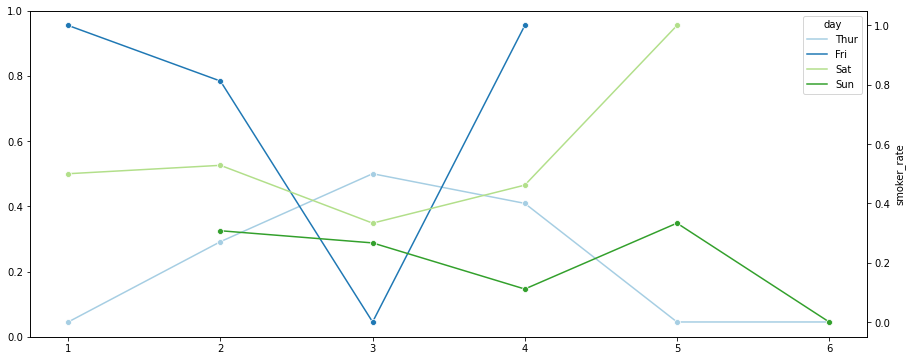

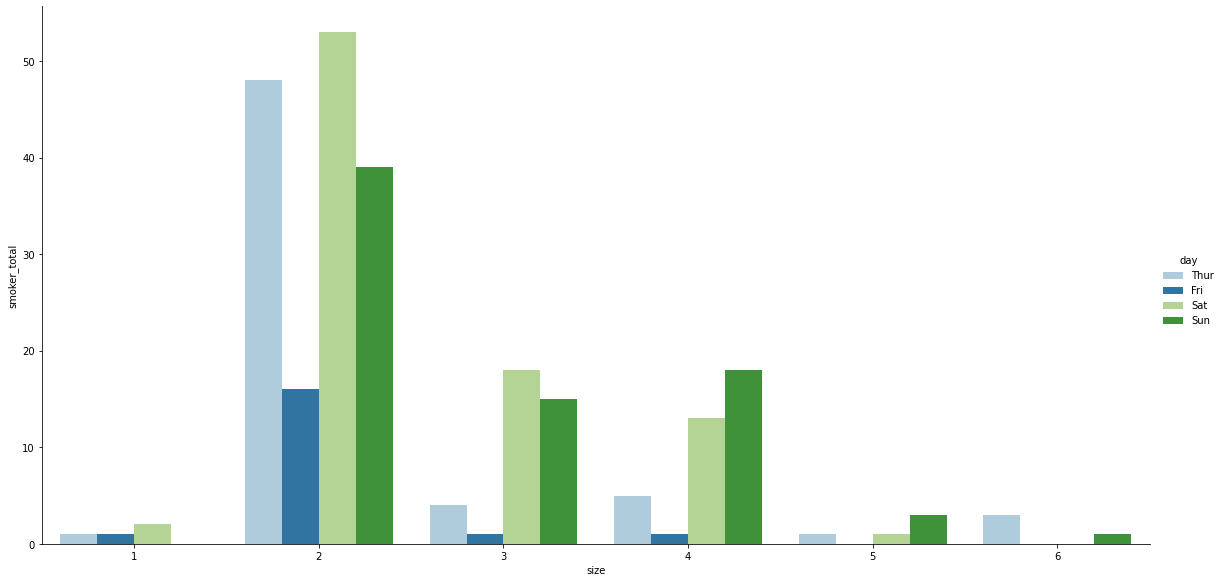

In [22]:
fig, ax = plt.subplots(figsize=(15,6))

sns.catplot(x='size',
            y='smoker_total',
            hue='day',
            data=tips_size_day_smoker,
            kind='bar',
            palette="Paired",
            height=8,
            aspect=2,
            ax=ax,
            legend=True)

sns.lineplot(x='size',  
             y='smoker_rate', 
             hue='day', 
             data=tips_size_day_smoker, 
             ax=ax.twinx(),
             marker='o', 
             legend=True,
             palette='Paired')


